## Analysis
1. Urban area has largest number of rides
2. Urban area has biggest number of drivers
3. Rurual area has fewest number of rides but higest average fares


## Imports and Constants

In [159]:
import os
from collections import OrderedDict
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# Use below data structus to facliate coloring
COLOR_MAP = OrderedDict([
    ('Urban', 'lightcoral'),
    ('Suburban', 'lightskyblue'),
    ('Rural', 'gold')
    ]
)
COLORS = [COLOR_MAP[t] for t in COLOR_MAP]
TYPES = [t for t in COLOR_MAP]
TYPES

['Urban', 'Suburban', 'Rural']

## Prepare Data

In [160]:
city_file = os.path.join('raw_data', 'city_data.csv')
df_city = pd.read_csv(city_file)

ride_file = os.path.join('raw_data', 'ride_data.csv')
df_ride = pd.read_csv(ride_file)

df_city = df_city.merge(
    df_ride.groupby('city')[['fare', 'ride_id']].agg(
        {
            'fare': 'mean',
            'ride_id': 'count',
        }
    ).reset_index().rename(
        columns={
             'fare': 'fare_average',
             'ride_id': 'ride_count',
        }
    ),
    on='city',
    how='left'
)
df_city.head()

,city,driver_count,type,fare_average,ride_count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


## Bubble Plot of Ride Sharing Data

__Note__: When plotting the size is multiplied by 10 to show more apparent differences.

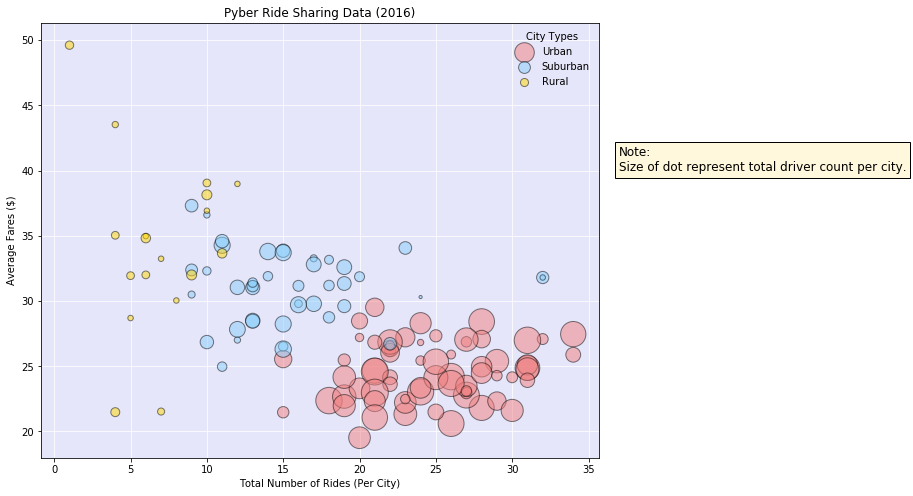

In [161]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Multiply side by 10 to see differences easier
handles = [
    plt.scatter(
        s=df_city[df_city['type'] == type]['driver_count'] * 10,
        x=df_city[df_city['type'] == type]['ride_count'],
        y=df_city[df_city['type'] == type]['fare_average'],
        alpha=0.5,
        label=type,
        edgecolor='black',
        color=COLOR_MAP[type],
        #facecolor='gray'
    ) for type in df_city['type'].unique()
]

plt.legend(
    handles=handles,
    title='City Types',
    loc='best',
    markerscale=None,
    framealpha=0,
)

ax.text(37, 40, 'Note:\nSize of dot represent total driver count per city.',
         fontsize=12,
         bbox=dict(facecolor='cornsilk'))
ax.set_facecolor('lavender')

ax.set_axisbelow(True)
plt.grid(True, color='white')

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

plt.show()

## Total Fares by City Type

### Compute Total Fares for Each City
This data set can be used on all below three pie charts.

In [162]:
df_city = df_city.merge(
    df_ride.groupby('city')['fare'].sum(
    ).to_frame().reset_index().rename(
        columns={
             'fare': 'fare_total',
        }
    ),
    on='city',
    how='left'
)
df_city.head()

,city,driver_count,type,fare_average,ride_count,fare_total
0,Kelseyland,63,Urban,21.806429,28,610.58
1,Nguyenbury,8,Urban,25.899615,26,673.39
2,East Douglas,12,Urban,26.169091,22,575.72
3,West Dawnfurt,34,Urban,22.330345,29,647.58
4,Rodriguezburgh,52,Urban,21.332609,23,490.65


### Plot Pie Charts

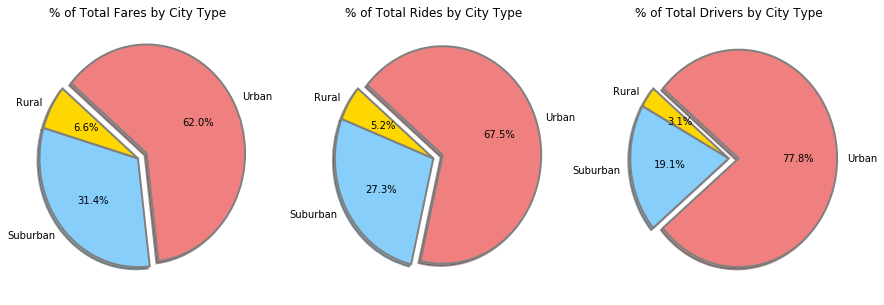

In [163]:
plt.figure(figsize=(15, 5))
kwargs = {
    'startangle': 140,
    'explode': [0.1, 0, 0],
    'shadow': True,
    'pctdistance': 0.6,
    'autopct': '%1.1f%%',
    'colors': COLORS,
    'labels': TYPES,
    'counterclock': False,
    'wedgeprops': {'linewidth': 2, 'edgecolor': 'grey'}
}

plt.subplot(131)
plt.title('% of Total Fares by City Type')
plt.pie(
    df_city.groupby('type')['fare_total'].sum()[TYPES], 
    **kwargs
)

plt.subplot(132)
plt.title('% of Total Rides by City Type')
plt.pie(
    df_city.groupby('type')['ride_count'].sum()[TYPES],
    **kwargs
)

plt.subplot(133)
plt.title('% of Total Drivers by City Type')
plt.pie(
    df_city.groupby('type')['driver_count'].sum()[TYPES], 
    **kwargs
)

plt.show()